**Predicting StreamFlow**

In this notebook, we will predict Streamflow. Our dataset is from the year 2021 and downloaded from [cite](https://www.boisestate.edu/drycreek/dry-creek-data/lower-gauge/#historical-data 
)

In [1]:
#pip install numpy

In [2]:
#pip install pandas

In [3]:
#pip install matplotlib

In [4]:
#pip install matplotlib

In [5]:
#pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('LG_StreamHrlySummary_2021.csv')
df

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,1/1/21 0:00,93.51,0.8,0.098
1,1/1/21 1:00,95.00,0.8,0.098
2,1/1/21 2:00,95.00,0.8,0.098
3,1/1/21 3:00,96.51,0.9,0.098
4,1/1/21 4:00,97.27,0.9,0.098
...,...,...,...,...
8755,12/31/21 19:00,68.50,0.0,0.184
8756,12/31/21 20:00,67.91,0.0,0.185
8757,12/31/21 21:00,67.32,0.0,0.185
8758,12/31/21 22:00,66.74,0.0,0.184


In [3]:
# cleaning the file
datetime = np.array(df['DateTime'])
discharge = np.array(df['Discharge-L/s'])
streamT = np.array(df['StreamTemp-C'])
streamEC = np.array(df['StreamEC-mS/cm'])

# creating a new data frame
with open('LG_StreamHrlySummary_2021_new.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if discharge[i] != -6999:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')
    

# lets find and store the entry with -6999
with open('LG_StreamHrlySummary_2021_6999.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    entries = []
    for i in range(len(datetime)):
        if discharge[i] == -6999:
            entries.append(i)
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')

#  lets find and store the entries before -6999
with open('LG_StreamHrlySummary_2021_b4.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if i < entries[0]:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')

#  lets find and store the entries after -6999         
with open('LG_StreamHrlySummary_2021_after.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if i > entries[-1]:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')


In [4]:
df_b4 =pd.read_csv('LG_StreamHrlySummary_2021_b4.csv')
df_b4

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,1/1/21 0:00,93.51,0.8,0.098
1,1/1/21 1:00,95.00,0.8,0.098
2,1/1/21 2:00,95.00,0.8,0.098
3,1/1/21 3:00,96.51,0.9,0.098
4,1/1/21 4:00,97.27,0.9,0.098
...,...,...,...,...
5718,8/27/21 6:00,3.41,14.9,0.173
5719,8/27/21 7:00,3.41,14.8,0.171
5720,8/27/21 8:00,3.56,14.9,0.170
5721,8/27/21 9:00,3.94,15.3,0.169


In [5]:
#these are the -6999 values
df_6999 =pd.read_csv('LG_StreamHrlySummary_2021_6999.csv')
df_6999

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,8/27/21 11:00,-6999.0,16.6,0.198
1,8/27/21 12:00,-6999.0,16.7,0.197
2,8/27/21 13:00,-6999.0,16.9,0.197
3,8/27/21 14:00,-6999.0,17.1,0.197
4,8/27/21 15:00,-6999.0,17.3,0.199
...,...,...,...,...
1101,10/12/21 8:00,-6999.0,5.6,0.196
1102,10/12/21 9:00,-6999.0,5.6,0.196
1103,10/12/21 10:00,-6999.0,5.6,0.196
1104,10/12/21 11:00,-6999.0,5.6,0.196


In [6]:
df_after=pd.read_csv('LG_StreamHrlySummary_2021_after.csv')
df_after

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,10/12/21 13:00,32.52,6.0,0.172
1,10/12/21 14:00,32.52,6.4,0.172
2,10/12/21 15:00,32.88,6.7,0.171
3,10/12/21 16:00,32.52,7.0,0.172
4,10/12/21 17:00,32.88,7.2,0.171
...,...,...,...,...
1926,12/31/21 19:00,68.50,0.0,0.184
1927,12/31/21 20:00,67.91,0.0,0.185
1928,12/31/21 21:00,67.32,0.0,0.185
1929,12/31/21 22:00,66.74,0.0,0.184


In [7]:
#lets do this find and store the entry with -6999
with open('LG_StreamHrlySummary_2021_6999.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    entries = []
    for i in range(len(datetime)):
        if discharge[i] == -6999:
            entries.append(i)
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')

#  find and store the entries before -6999
with open('LG_StreamHrlySummary_2021_b4.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if i < entries[0]:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')

#  find and store the entries after -6999         
with open('LG_StreamHrlySummary_2021_after.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if i > entries[-1]:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')

df_after =pd.read_csv('LG_StreamHrlySummary_2021_after.csv')
df_after

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,10/12/21 13:00,32.52,6.0,0.172
1,10/12/21 14:00,32.52,6.4,0.172
2,10/12/21 15:00,32.88,6.7,0.171
3,10/12/21 16:00,32.52,7.0,0.172
4,10/12/21 17:00,32.88,7.2,0.171
...,...,...,...,...
1926,12/31/21 19:00,68.50,0.0,0.184
1927,12/31/21 20:00,67.91,0.0,0.185
1928,12/31/21 21:00,67.32,0.0,0.185
1929,12/31/21 22:00,66.74,0.0,0.184


Discharge is being recorded hourly starting from the first hour of the first day of the year to the last hour of the last day of the year. We can notice that we have columns of Stream Temperature and Stream Electrical Conductivity as well. These two columns are important because, firstly,  Stream temperature affects discharge through thermal expansion, melting snow/ice, and evaporation, with warmer temperatures generally increasing discharge. Additionally,  Stream electrical conductivity (EC) reflects dissolved solids concentration, groundwater interaction, and pollution, which can impact discharge rates by affecting water density, groundwater inflow, and stream morphology, respectively, highlighting their interconnected roles in hydrological processes.

We notice after reading our csv file that -6999 was being used to fill in for missing data. Therefore, we need to clean and drop these values for better analysis.

**ANALYSIS**

In [8]:
# creating a new data frame
with open('LG_StreamHrlySummary_2021_new.csv', 'w') as f:
    f.write('DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm\n')
    for i in range(len(datetime)):
        if discharge[i] != -6999:
            f.write(datetime[i]+','+str(discharge[i])+','+str(streamT[i])+','+str(streamEC[i])+'\n')
    


In [9]:
df=pd.read_csv('LG_StreamHrlySummary_2021_new.csv')
df

,DateTime,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
0,1/1/21 0:00,93.51,0.8,0.098
1,1/1/21 1:00,95.00,0.8,0.098
2,1/1/21 2:00,95.00,0.8,0.098
3,1/1/21 3:00,96.51,0.9,0.098
4,1/1/21 4:00,97.27,0.9,0.098
...,...,...,...,...
7649,12/31/21 19:00,68.50,0.0,0.184
7650,12/31/21 20:00,67.91,0.0,0.185
7651,12/31/21 21:00,67.32,0.0,0.185
7652,12/31/21 22:00,66.74,0.0,0.184


In [10]:
df.describe()

,Discharge-L/s,StreamTemp-C,StreamEC-mS/cm
count,7654.000000,7654.000000,7654.000000
mean,117.434537,8.381304,0.149350
std,108.760652,6.854154,0.035289
min,2.070000,-0.100000,0.069000
25%,38.720000,2.400000,0.124000
50%,77.190000,6.500000,0.150000
75%,185.300000,14.200000,0.173000
max,436.940000,23.900000,0.308000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7654 entries, 0 to 7653
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        7654 non-null   object 
 1   Discharge-L/s   7654 non-null   float64
 2   StreamTemp-C    7654 non-null   float64
 3   StreamEC-mS/cm  7654 non-null   float64
dtypes: float64(3), object(1)
memory usage: 239.3+ KB


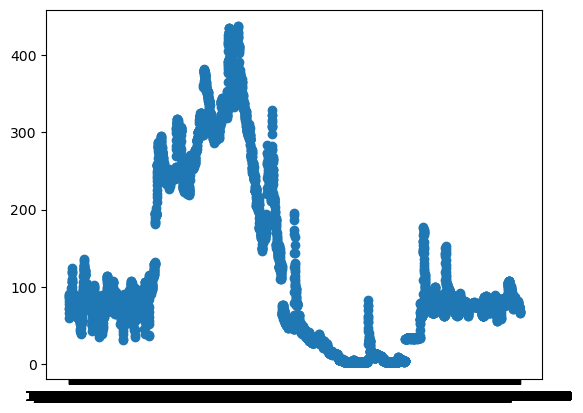

In [36]:
#let us see this data by ploting each column with datetime 

plt.scatter(df['DateTime'],df['Discharge-L/s'])





<Axes: xlabel='DateTime'>

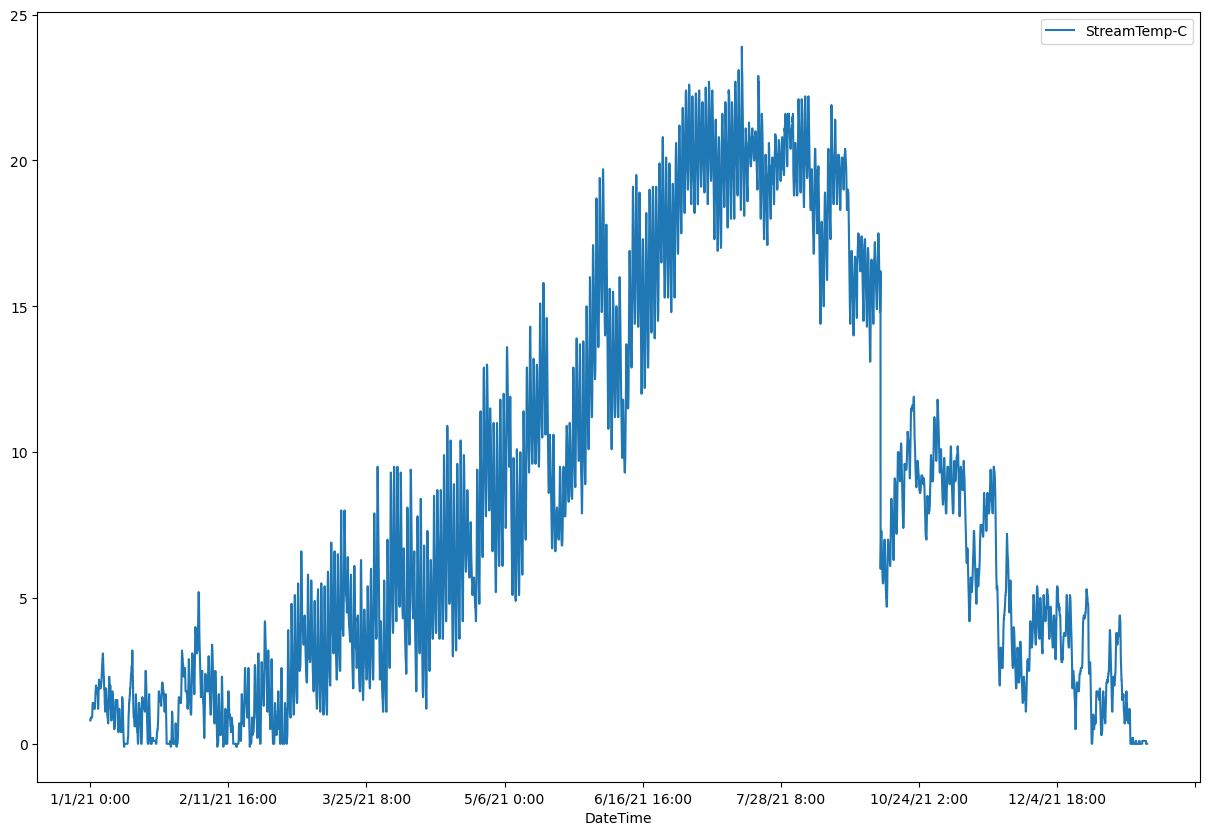

In [18]:
df.plot(x='DateTime',y='StreamTemp-C',figsize=(15,10))

<Axes: xlabel='DateTime'>

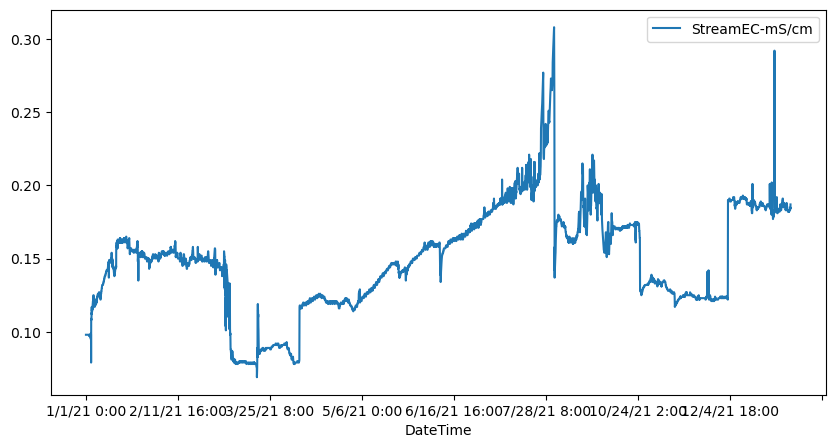

In [19]:
df.plot(x='DateTime',y='StreamEC-mS/cm',figsize=(10,5))

I can't see much from the plots of the 1st column and 3rd colum in terms of interpretation so let me make a histogram of them and scatterplot to see how they will look 

Discharge-L/s

<Axes: ylabel='Frequency'>

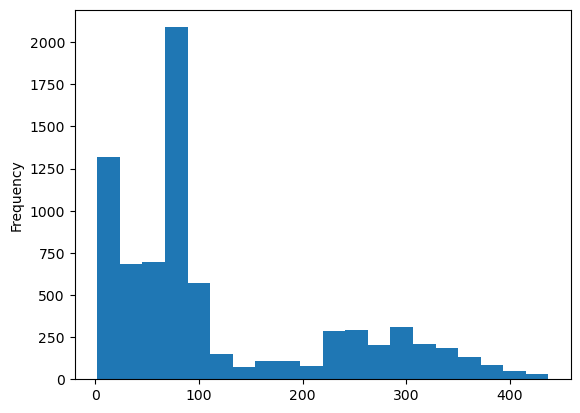

In [20]:

df['Discharge-L/s'].plot(kind='hist', bins=20)

StreamEC-mS/cm

<Axes: ylabel='Frequency'>

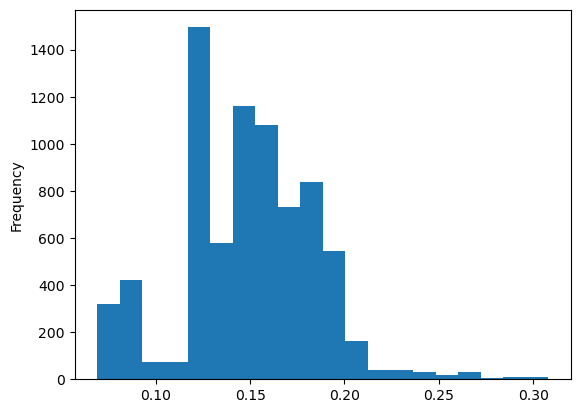

In [21]:
df['StreamEC-mS/cm'].plot(kind='hist', bins=20)

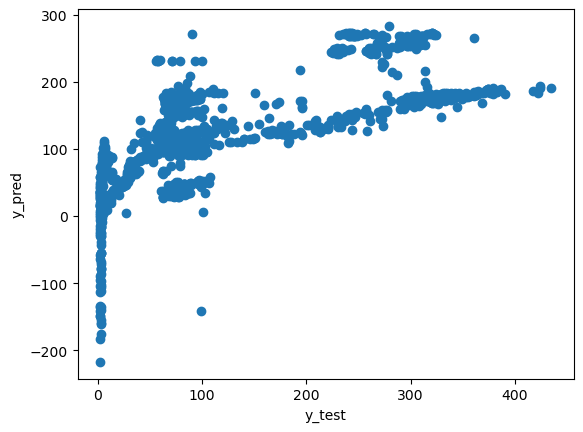

In [23]:
X = df[['StreamTemp-C', 'StreamEC-mS/cm']]
y = df['Discharge-L/s']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


I am not quite sure we can make much sense of this output, lets explore further. What if we lag the values.

Lagging the discharge 

<Axes: ylabel='Frequency'>

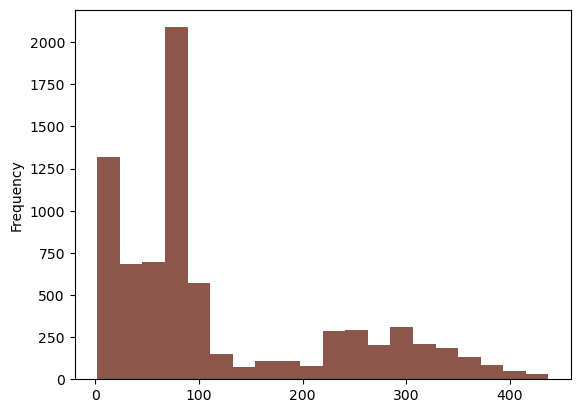

In [24]:

df['Discharge-L/s_lag1'] = df['Discharge-L/s'].shift(1)
df['Discharge-L/s_lag2'] = df['Discharge-L/s'].shift(2)
df['Discharge-L/s_lag3'] = df['Discharge-L/s'].shift(3)
df['Discharge-L/s_lag4'] = df['Discharge-L/s'].shift(4)
df['Discharge-L/s_lag5'] = df['Discharge-L/s'].shift(5)
df['Discharge-L/s_lag6'] = df['Discharge-L/s'].shift(6)
# lets display it
df['Discharge-L/s_lag1'].plot(kind='hist', bins=20)
df['Discharge-L/s_lag2'].plot(kind='hist', bins=20)
df['Discharge-L/s_lag3'].plot(kind='hist', bins=20)
df['Discharge-L/s_lag4'].plot(kind='hist', bins=20)
df['Discharge-L/s_lag5'].plot(kind='hist', bins=20)
df['Discharge-L/s_lag6'].plot(kind='hist', bins=20)


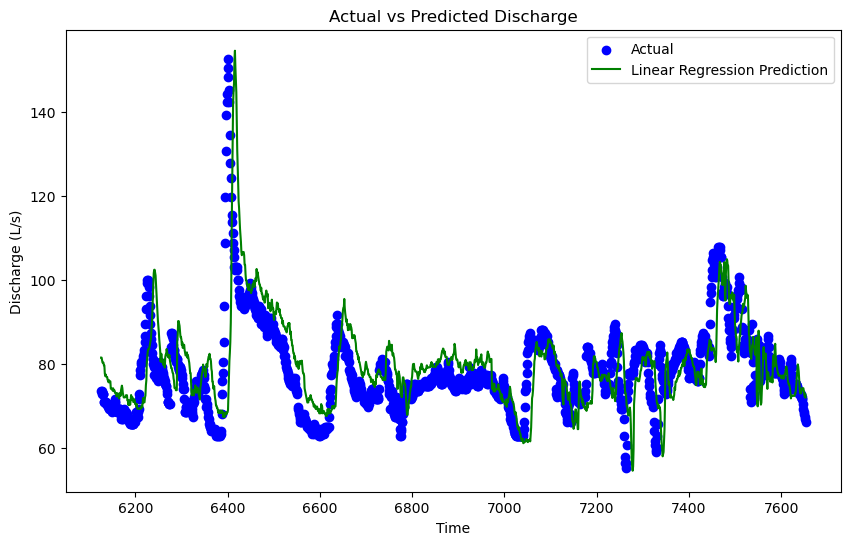

In [25]:
n = 15

df['Discharge-Lag'] = df['Discharge-L/s'].shift(n)

# we drop the NaN values here
df.dropna(inplace=True)

X = df[['StreamTemp-C', 'StreamEC-mS/cm', 'Discharge-Lag']]
y = df['Discharge-L/s']

split_index = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# using X_train and y_train we tran the linear regresson model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# we are predicting 
y_pred_linear = linear_model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred_linear, color='green', label='Linear Regression Prediction')
plt.xlabel('Time')
plt.ylabel('Discharge (L/s)')
plt.title('Actual vs Predicted Discharge')
plt.legend()
plt.show()


What if we vary values of n? We will do lower then also a high value and observe

Lower Value

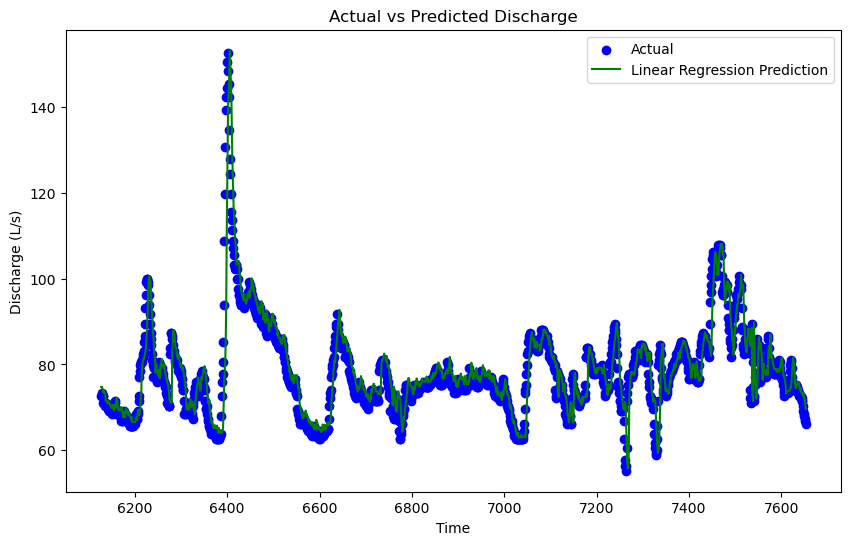

In [26]:
n = 5

df['Discharge-Lag'] = df['Discharge-L/s'].shift(n)

# we drop the NaN values here
df.dropna(inplace=True)

X = df[['StreamTemp-C', 'StreamEC-mS/cm', 'Discharge-Lag']]
y = df['Discharge-L/s']

split_index = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# using X_train and y_train we tran the linear regresson model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# we are predicting 
y_pred_linear = linear_model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred_linear, color='green', label='Linear Regression Prediction')
plt.xlabel('Time')
plt.ylabel('Discharge (L/s)')
plt.title('Actual vs Predicted Discharge')
plt.legend()
plt.show()


We can notice a very close fitting it is nearly perfectespecially starting after the 7250th hour of the time axis.

Higher Value of n

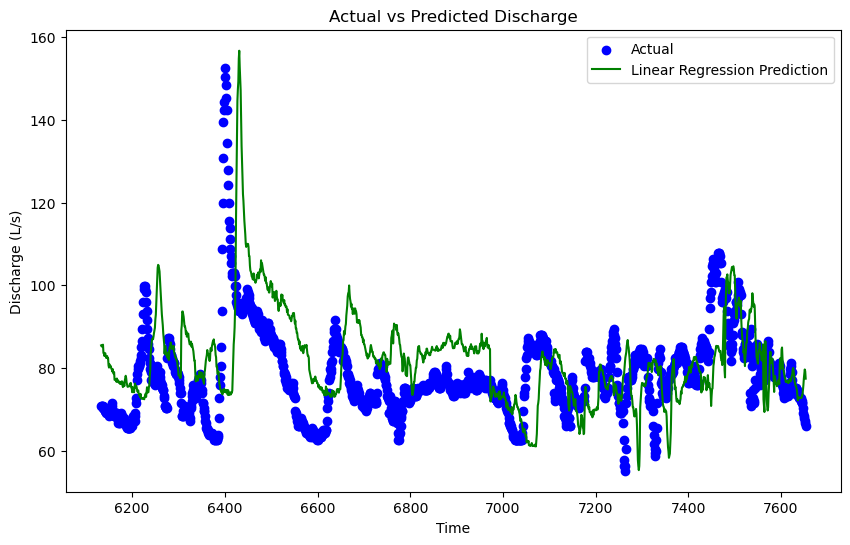

In [27]:
n = 30

df['Discharge-Lag'] = df['Discharge-L/s'].shift(n)

# we drop the NaN values here
df.dropna(inplace=True)

X = df[['StreamTemp-C', 'StreamEC-mS/cm', 'Discharge-Lag']]
y = df['Discharge-L/s']

split_index = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# using X_train and y_train we tran the linear regresson model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# we are predicting 
y_pred_linear = linear_model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred_linear, color='green', label='Linear Regression Prediction')
plt.xlabel('Time')
plt.ylabel('Discharge (L/s)')
plt.title('Actual vs Predicted Discharge')
plt.legend()
plt.show()

We can notice that the higher the more we lag our variable, it moves away from our actual discharge. Our predicted discharge is far from what the actual is when we keep lagging to higher values of n. At this point we can explore other models  to see if they can have a better prediction of our streamflow, discharge in this case, which is also our y column.

Timeseries

We will try timeseries but not using lags, we will try a different model to see how it will predict our data, according to [source](https://core.ac.uk/download/pdf/234678525.pdf), it gave ARIMA as the best model for timeseries so lets try using it. We will compare the prediction of linear regression and of the ARIMA model.

In [28]:
#pip install statsmodels

/Users/tapiwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tapiwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tapiwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tapiwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tapiwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: N

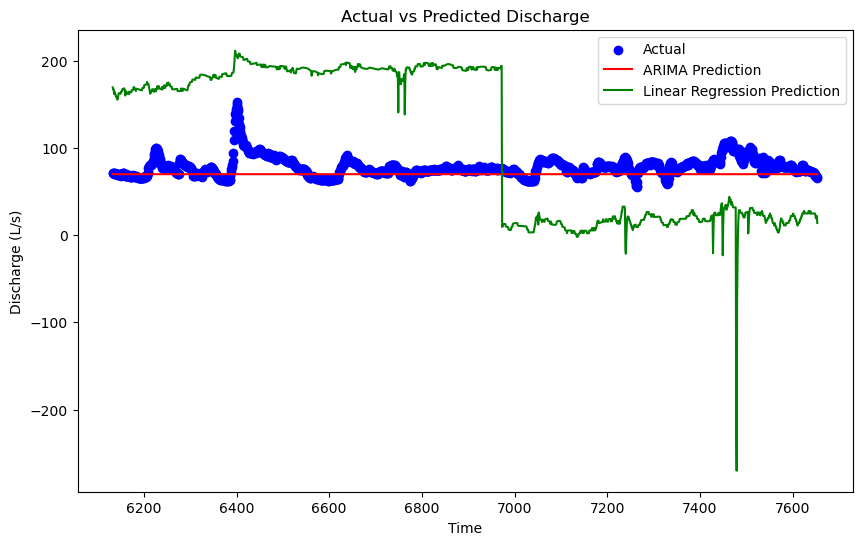

In [29]:


#lets define our X and Y
X = df[['StreamTemp-C', 'StreamEC-mS/cm']]
y = df['Discharge-L/s']

split_index = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# we will fit an ARIMA model to the target variable (y)
arima_model = ARIMA(y_train, order=(2, 1, 0))
arima_results = arima_model.fit()

# Predicting using the ARIMA model
y_pred_arima = arima_results.forecast(steps=len(X_test))

# we are training a linear regression model using X_train and y_train
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

#This is to  plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred_arima, color='red', label='ARIMA Prediction')
plt.plot(y_test.index, y_pred_linear, color='green', label='Linear Regression Prediction')
plt.xlabel('Time')
plt.ylabel('Discharge (L/s)')
plt.title('Actual vs Predicted Discharge')
plt.legend()
plt.show()


From the plot, ARIMA's prediction is better than that of linear regression since the prediction of streamflow by ARIMA is close to the actual data that we are using. 